<a href="https://colab.research.google.com/github/anjanasa13/Screen-time-analysis/blob/main/Screen_time__analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROBLEM
 Analyzing a user's screen time is instrumental for smartphone companies in providing a comprehensive overview of the user's activities on their device. This analysis aids users in gaining insights into whether their time was spent productively, creatively, or if there was time wastage. By scrutinizing screen time, it becomes possible to uncover relationships between smartphone usage and factors such as notifications and the specific apps employed by the user. This exploration can shed light on patterns, preferences, and dependencies, contributing to a more nuanced understanding of how individuals interact with their smartphones and the impact on their overall engagement and efficiency.

Analyze the screen time of the user to find relationships between the usage of the smartphone and factors like notifications and apps used by the user.



In [1]:
from google.colab import files
uploaded = files.upload()

Saving Screentime-App-Details.csv to Screentime-App-Details.csv


Importing the necessary python libraries and the dataset.

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

data = pd.read_csv("/content/Screentime-App-Details.csv")
print(data.head())

         Date  Usage  Notifications  Times opened        App
0  08/26/2022     38             70            49  Instagram
1  08/27/2022     39             43            48  Instagram
2  08/28/2022     64            231            55  Instagram
3  08/29/2022     14             35            23  Instagram
4  08/30/2022      3             19             5  Instagram


Check for null values in the dataset.

In [3]:
data.isnull().sum()

Date             0
Usage            0
Notifications    0
Times opened     0
App              0
dtype: int64

There are no null values in the dataset

Let us look into the descriptive statistics of the data.



In [4]:
print(data.describe())

            Usage  Notifications  Times opened
count   54.000000      54.000000     54.000000
mean    65.037037     117.703704     61.481481
std     58.317272      97.017530     43.836635
min      1.000000       8.000000      2.000000
25%     17.500000      25.750000     23.500000
50%     58.500000      99.000000     62.500000
75%     90.500000     188.250000     90.000000
max    244.000000     405.000000    192.000000


Analyzing the screen time of user: app usage

<ipython-input-11-27ecc12aec18>:8: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




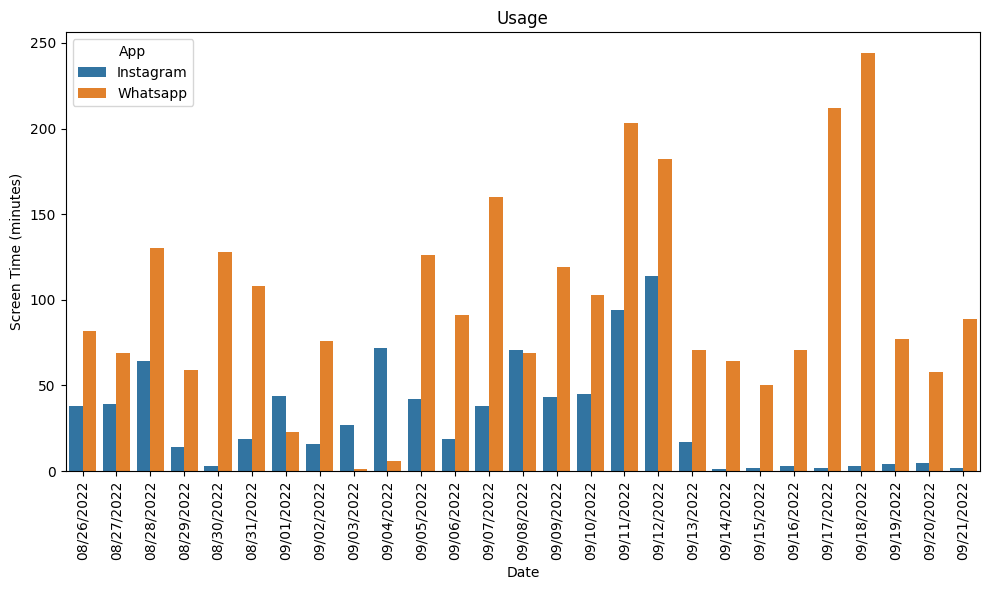

In [11]:

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.barplot(data=data,
            x="Date",
            y="Usage",
            hue="App",
            estimator=sum,  # To stack the bars
            ci=None)  # Disable error bars

plt.title("Usage")
plt.xlabel("Date")
plt.ylabel("Screen Time (minutes)")
plt.legend(title="App")


plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


An alternative line chart can provide a smooth visual representation of screen time trends over time.

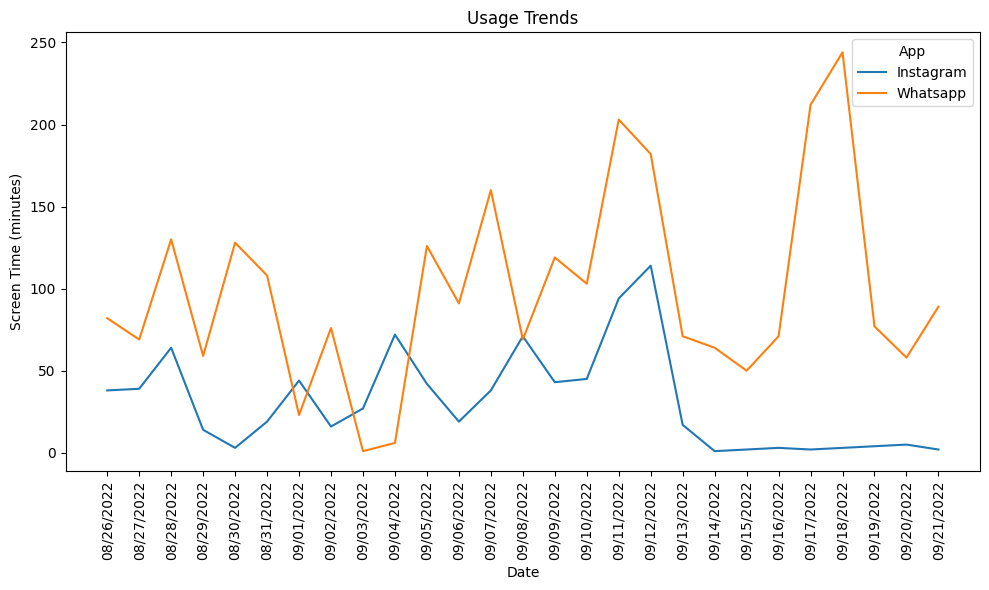

In [14]:
pivot_data = data.pivot(index='Date', columns='App', values='Usage')

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.lineplot(data=pivot_data, dashes=False)  # Set dashes=False to have solid lines

plt.title("Usage Trends")
plt.xlabel("Date")
plt.ylabel("Screen Time (minutes)")
plt.legend(title="App")
plt.xticks(rotation=90)

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

No. of notifications

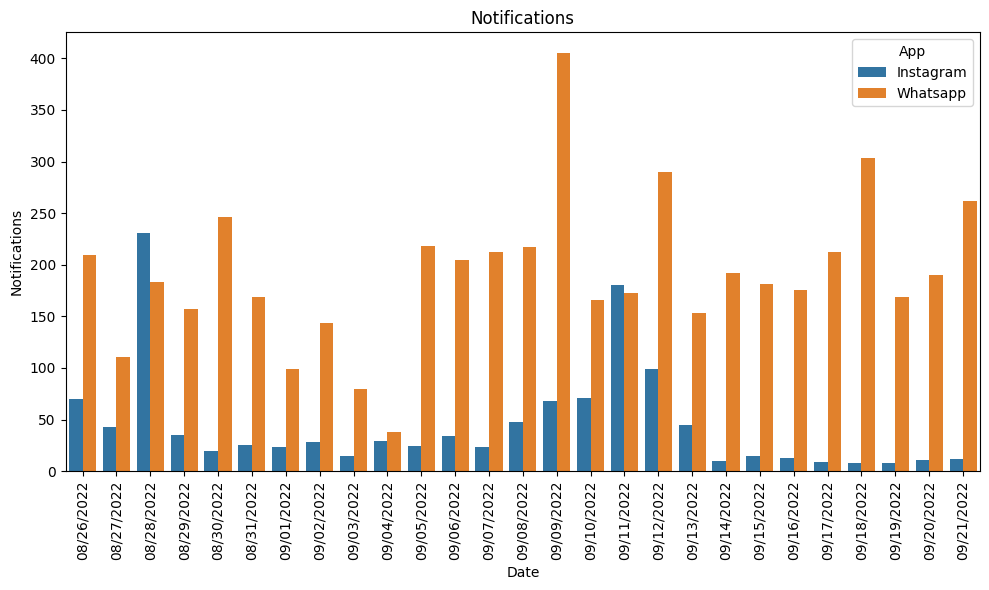

In [15]:


plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.barplot(data=data,
            x="Date",
            y="Notifications",
            hue="App")

plt.title("Notifications")
plt.xlabel("Date")
plt.ylabel("Notifications")
plt.legend(title="App")

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


Frequency of opening the app

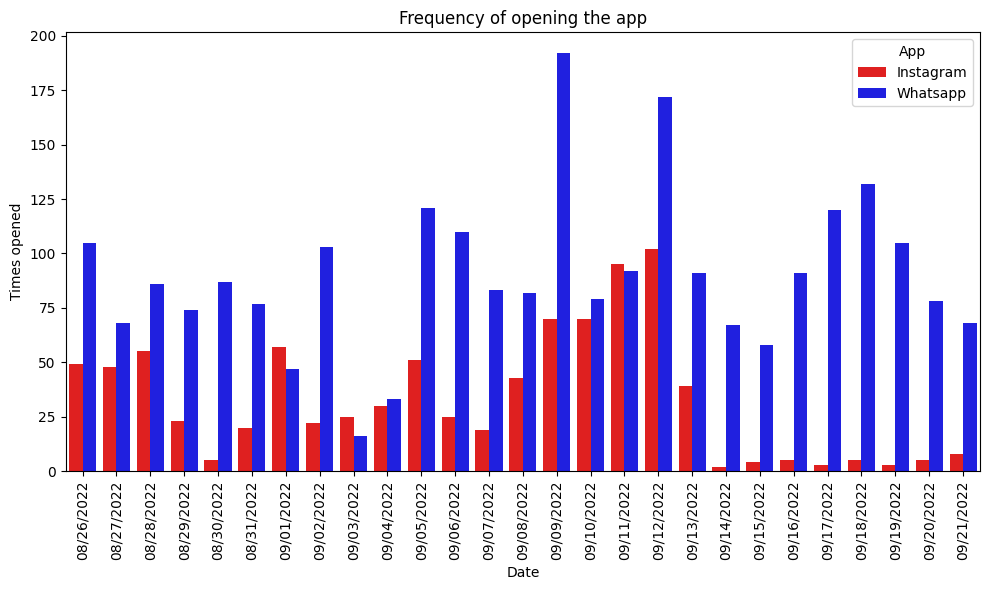

In [18]:


plt.figure(figsize=(10, 6))


custom_palette = sns.color_palette(["red", "blue"])

sns.barplot(data=data,
            x="Date",
            y="Times opened",
            hue="App",
            palette=custom_palette)

plt.title("Frequency of opening the app")
plt.xlabel("Date")
plt.ylabel("Times opened")
plt.legend(title="App")
plt.xticks(rotation=90)

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


Since we tend to check our smartphones when there is a notification,we shall examine the relationship between notifications and screen time

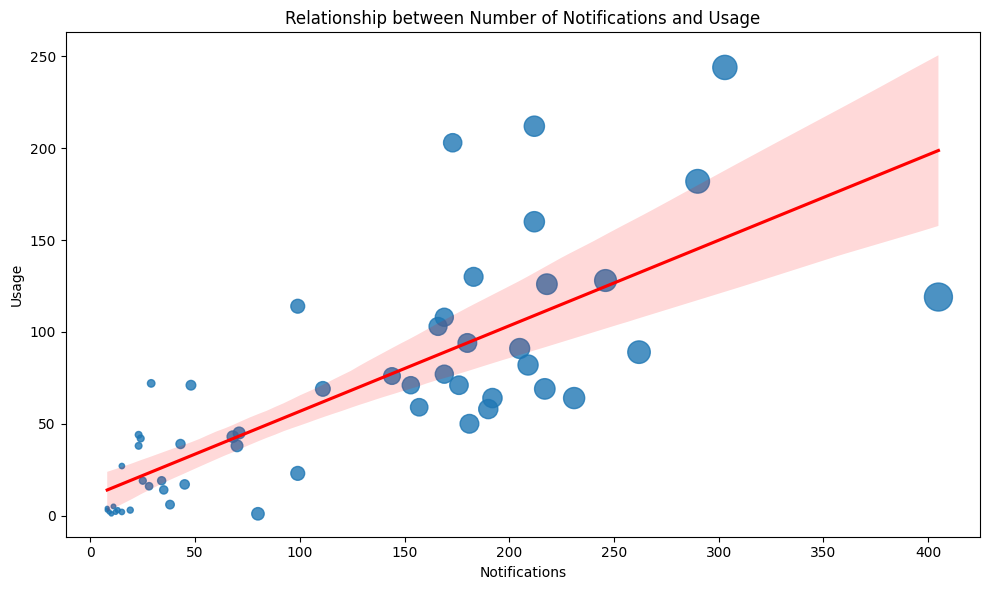

In [20]:


plt.figure(figsize=(10, 6))


sns.regplot(data=data, x="Notifications", y="Usage", scatter_kws={"s": data["Notifications"]}, line_kws={"color": "red"})

plt.title("Relationship between Number of Notifications and Usage")
plt.xlabel("Notifications")
plt.ylabel("Usage")

plt.tight_layout()
plt.show()


**A direct correlation exists between the quantity of notifications and the extent of smartphone usage. This signifies that an increase in the number of notifications correlates with a proportional rise in smartphone usage. In essence, more notifications lead to an increased utilization of smartphones.**